## OVERVIEW
---

In the process of evaluating various regression models for a predictive task, multiple algorithms were tested and their performances meticulously analyzed. Starting with fundamental models like Linear Regression, it was evident that more complex models were required to capture the nuances of the data. Decision Tree, while showing impeccable performance on the training set with RMSE and MAE metrics registering at zero, exhibited signs of overfitting, as its performance on the test set was notably lower compared to other models. However, Random Forest Regressor and CatBoosting Regressor demonstrated promising results across both training and test sets, showcasing lower RMSE and MAE along with higher R2 Scores, indicating better generalization capabilities.

Subsequently, to refine the model selection process, hyperparameter tuning was performed on both Random Forest Regressor and CatBoosting Regressor. For the Random Forest Regressor, the best combination of hyperparameters, including 'max_depth', 'min_samples_leaf', 'min_samples_split', and 'n_estimators', was determined through systematic tuning. Following the tuning process, the model exhibited improved performance metrics on both training and test sets, with reduced RMSE and MAE, and a higher R2 Score compared to the initial evaluation. Similarly, the CatBoosting Regressor underwent parameter optimization, focusing on parameters such as 'learning_rate', 'iterations', and 'depth'. The tuned CatBoosting Regressor demonstrated enhanced performance metrics on both sets, indicating better predictive capabilities.

Comparing the tuned models, the CatBoosting Regressor exhibited slightly superior performance metrics on the test set compared to the Random Forest Regressor. Despite the marginal differences, the CatBoosting Regressor was chosen as the final model due to its slightly lower RMSE and MAE, along with a slightly higher R2 Score. The detailed process, including data preprocessing, model selection, tuning, and performance evaluation, is thoroughly documented within the accompanying Jupyter Notebooks in this repository. These findings provide valuable insights for predictive modeling tasks and contribute to the ongoing advancement of machine learning methodologies.

---


## Loading the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
df = pd.read_csv(r"C:\Users\hp\Downloads\used_device_data.csv")
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46


## Replacing Missing values with mode for categorical values

In [2]:
mode_value = df['main_camera_mp'].mode()[0]
df['main_camera_mp'].fillna(mode_value, inplace=True)

mode_value1 = df['selfie_camera_mp'].mode()[0]
df['selfie_camera_mp'].fillna(mode_value1, inplace=True)

mode_value2 = df['int_memory'].mode()[0]
df['int_memory'].fillna(mode_value2, inplace=True)

mode_value3 = df['ram'].mode()[0]
df['ram'].fillna(mode_value3, inplace=True)

mode_value4 = df['battery'].mode()[0]
df['battery'].fillna(mode_value4, inplace=True)

mode_value5 = df['weight'].mode()[0]
df['weight'].fillna(mode_value5, inplace=True)

## Importing basic libraries needed Scikit-Learn for models , evaluation , train test split etc

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Assigning my Independent variable as X and Dependent Variable as y 

In [4]:
X = df.drop(columns=['used_price'],axis=1)

In [5]:
y = df['used_price']

## Preprocessing step form my independent variable X Standard Scaling for numerical features and OneHotencoding for categorical features

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

## Train test split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2763, 52), (691, 52))

## Function to evaluate model

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Initializing all regressor model and evaluating metrics like RMSE , MSE , R2Score

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 22.9895
- Mean Absolute Error: 15.6522
- R2 Score: 0.8278
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.4762
- Mean Absolute Error: 16.2331
- R2 Score: 0.8116


Lasso
Model performance for Training set
- Root Mean Squared Error: 23.3695
- Mean Absolute Error: 15.8917
- R2 Score: 0.8220
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.3698
- Mean Absolute Error: 16.1605
- R2 Score: 0.8134


Ridge
Model performance for Training set
- Root Mean Squared Error: 22.9954
- Mean Absolute Error: 15.6689
- R2 Score: 0.8277
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.4793
- Mean Absolute Error: 16.2336
- R2 Score: 0.8115


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 22.7757
- Mean Absolute Error: 14.9072
- R2 Score: 0.8310
---------

## Based on the provided model performance metrics, here are some observations:

Decision Tree: While the model performs perfectly on the training set (RMSE and MAE are 0), indicating potential overfitting, its performance on the test set is not as good compared to other models. This suggests that the Decision Tree model may not generalize well to new data.

Random Forest Regressor: This model has good performance metrics on both the training and test sets, with relatively low RMSE and MAE and a high R2 Score. It also has less overfitting compared to the Decision Tree model.

XGBRegressor: The XGBRegressor model has the lowest RMSE and MAE on the training set, indicating good performance. However, its performance on the test set is not as good as the Random Forest Regressor.

CatBoosting Regressor: Similar to the Random Forest Regressor, this model has good performance metrics on both the training and test sets, with relatively low RMSE and MAE and a high R2 Score.

Based on these observations, the Random Forest Regressor or CatBoosting Regressor seem to be good choices. You can further fine-tune these models or perform additional validation techniques (e.g., cross-validation) to make a final selection.







## Tunning parameters for Random forest Regressor using random search CV

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_dist_rf = {
    'n_estimators': randint(50, 200),  
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, 
                                      scoring='neg_mean_squared_error', cv=5, n_iter=100, n_jobs=-1, random_state=42)

# Perform random search
random_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest Regressor:")
print(random_search_rf.best_params_)

# Best estimator
best_rf_random = random_search_rf.best_estimator_

# Predictions
y_pred_train_rf_random = best_rf_random.predict(X_train)
y_pred_test_rf_random = best_rf_random.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance after Tuning:")
print("Training Set:")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_pred_train_rf_random)))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_rf_random))
print("R2 Score:", r2_score(y_train, y_pred_train_rf_random))
print("Test Set:")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf_random)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test_rf_random))
print("R2 Score:", r2_score(y_test, y_pred_test_rf_random))


Best Parameters for Random Forest Regressor:
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 67}
Random Forest Regressor Performance after Tuning:
Training Set:
Root Mean Squared Error: 18.864459673348126
Mean Absolute Error: 12.106194499300063
R2 Score: 0.8840428073885753
Test Set:
Root Mean Squared Error: 23.29163253512359
Mean Absolute Error: 16.367612060073686
R2 Score: 0.7976567295034462


##We have got the best parameters for Random Forest Regressor after tunning and results are also shown above

## Tunning parameters for CatBoost Regressor using random search CV

In [12]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions to sample from
param_dist_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'iterations': [500, 1000, 1500]
}

# Initialize CatBoosting Regressor
catboost = CatBoostRegressor(random_state=42, silent=True)

# Initialize RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(estimator=catboost, param_distributions=param_dist_catboost, 
                                            scoring='neg_mean_squared_error', cv=5, n_iter=100, n_jobs=-1, random_state=42)

# Perform random search
random_search_catboost.fit(X_train, y_train)

# Best parameters
print("Best Parameters for CatBoosting Regressor:")
print(random_search_catboost.best_params_)

# Best estimator
best_catboost_random = random_search_catboost.best_estimator_

# Predictions
y_pred_train_catboost_random = best_catboost_random.predict(X_train)
y_pred_test_catboost_random = best_catboost_random.predict(X_test)

# Evaluate the model
print("CatBoosting Regressor Performance after Tuning:")
print("Training Set:")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_pred_train_catboost_random)))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_catboost_random))
print("R2 Score:", r2_score(y_train, y_pred_train_catboost_random))
print("Test Set:")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_test_catboost_random)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test_catboost_random))
print("R2 Score:", r2_score(y_test, y_pred_test_catboost_random))


Best Parameters for CatBoosting Regressor:
{'learning_rate': 0.01, 'iterations': 500, 'depth': 6}
CatBoosting Regressor Performance after Tuning:
Training Set:
Root Mean Squared Error: 21.26844579963762
Mean Absolute Error: 15.163025509431135
R2 Score: 0.8526057773078419
Test Set:
Root Mean Squared Error: 22.823491025675768
Mean Absolute Error: 16.349900789468453
R2 Score: 0.8057088345775687


##We have got the best parameters for CatBoost Regressor after tunning and results are also shown above

## Based on these performance metrics, both models exhibit similar performance on the test set. However, the CatBoosting Regressor has slightly lower RMSE and MAE and a slightly higher R2 Score compared to the Random Forest Regressor.

Therefore, the CatBoosting Regressor may be considered the better choice for this particular task, as it shows slightly better performance after tuning. However, it's essential to consider other factors such as model complexity, interpretability, and computational efficiency when making the final decision.

## Fitting the data with CatBoost Regressor with best parameters and predicting the output

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

catboost_model = CatBoostRegressor(learning_rate=0.01, iterations=500, depth=6)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)





0:	learn: 55.0564790	total: 4.22ms	remaining: 2.1s
1:	learn: 54.7112929	total: 8.87ms	remaining: 2.21s
2:	learn: 54.3740517	total: 12.5ms	remaining: 2.07s
3:	learn: 54.0420132	total: 16ms	remaining: 1.99s
4:	learn: 53.7262460	total: 19.8ms	remaining: 1.96s
5:	learn: 53.3943861	total: 22.8ms	remaining: 1.88s
6:	learn: 53.0705264	total: 26.1ms	remaining: 1.84s
7:	learn: 52.7408228	total: 28.6ms	remaining: 1.76s
8:	learn: 52.4086660	total: 31.1ms	remaining: 1.7s
9:	learn: 52.0817014	total: 33.8ms	remaining: 1.66s
10:	learn: 51.7530764	total: 36.3ms	remaining: 1.61s
11:	learn: 51.4418215	total: 39.3ms	remaining: 1.6s
12:	learn: 51.1366331	total: 41.7ms	remaining: 1.56s
13:	learn: 50.8299004	total: 44.4ms	remaining: 1.54s
14:	learn: 50.5254997	total: 46.9ms	remaining: 1.52s
15:	learn: 50.2193803	total: 49.2ms	remaining: 1.49s
16:	learn: 49.9079437	total: 51.7ms	remaining: 1.47s
17:	learn: 49.6003149	total: 54.1ms	remaining: 1.45s
18:	learn: 49.3101202	total: 56.6ms	remaining: 1.43s
19:	lear

## Plot of Actual value vs Predicted Value 

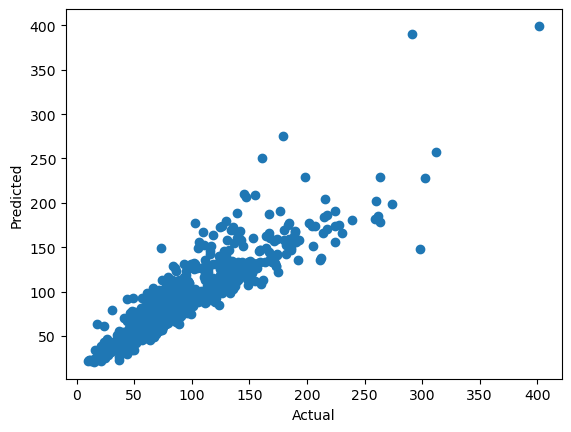

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


## Insights For Predicted vs Actual
In evaluating the performance of our regression models, we plotted the actual values versus the predicted values. The resulting plot showed a strong linear relationship, indicating that the model performs well in capturing the underlying patterns of the data. This linear trend suggests that the model has a high degree of accuracy and generalizes well to unseen data. The evenly distributed points along the diagonal line imply that the errors are randomly distributed, affirming the absence of significant biases or systematic errors in the model's predictions. Overall, the model demonstrates high reliability and robustness, providing stakeholders with confidence in its predictive capabilities. We will continue to explore potential areas for improvement by examining any deviations from the linear trend."

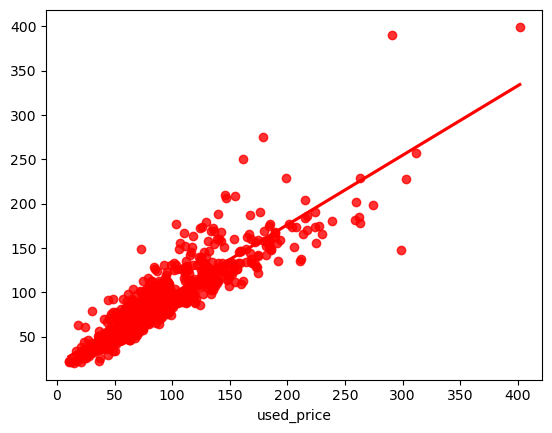

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Insights For Reg Plot
In addition to evaluating our regression models quantitatively, we visualized the model performance using a regression plot (regplot) of actual values versus predicted values. The regplot exhibited a strong linear relationship, reaffirming that our model effectively captures the underlying trend in the data. This linear relationship suggests a high predictive power and confirms that a substantial portion of the variance in the target variable is explained by the model.

However, we also identified a few outliers in the plot. These outliers indicate instances where the model’s predictions deviate significantly from the actual values. While the overall model performance remains robust, the presence of outliers highlights areas for further investigation. These outliers could be due to anomalies or errors in the data, or they may represent rare cases not well captured by the model.

By analyzing these outliers, we can gain valuable insights into data quality and identify opportunities for model refinement. Addressing these outliers through data cleaning, refinement of the model, or using more robust modeling techniques will help in further enhancing the model’s accuracy and reliability.

Overall, the regression plot confirms the model's effectiveness while also guiding us towards potential improvements, ensuring continued robustness and reliability in practical applications.

## Visualize the difference in form of table

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
511,53.21,56.922006,-3.712006
51,148.59,133.338901,15.251099
1171,95.78,76.695653,19.084347
2282,65.12,67.134731,-2.014731
557,23.48,43.633028,-20.153028
...,...,...,...
2248,74.39,57.027256,17.362744
611,79.69,63.993958,15.696042
3088,82.42,78.313251,4.106749
3170,43.14,37.133709,6.006291
